# Download metadata from Xeno-Canto to infer species activities

The goal of this example is to show how to download metadata from Xeno-Canto to infer species activities. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from maad import util

# Query Xeno-Canto

array with english name and scientific name of all european woodpeckers

In [2]:
data = [['Eurasian Three-toed', 'Picoides tridactylus'],
        ['White-backed',        'Dendrocopos leucotos'],
        ['Lesser Spotted',          'Dryobates minor'],
        ['Great Spotted',       'Dendrocopos major'],
        ['Black',                   'Dryocopus martius'],
        ['Grey-headed',             'Picus canus'],
        ['Syrian',              'Dendrocopos syriacus'],
        ['Wryneck',             'Jynx torquilla'],
        ['Green',               'Picus viridis'],
        ['Middle Spotted',      'Dendrocoptes medius']]

# data = [['Blue Jay', 'Cyanocitta cristata'],
#         ['Eastern Wood Pewee', 'Contopus virens'],
#         ['House Wren', 'Troglodytes aedon'],
#         ['Indigo Bunting', 'Passerina cyanea']]

In [3]:
data

[['Eurasian Three-toed', 'Picoides tridactylus'],
 ['White-backed', 'Dendrocopos leucotos'],
 ['Lesser Spotted', 'Dryobates minor'],
 ['Great Spotted', 'Dendrocopos major'],
 ['Black', 'Dryocopus martius'],
 ['Grey-headed', 'Picus canus'],
 ['Syrian', 'Dendrocopos syriacus'],
 ['Wryneck', 'Jynx torquilla'],
 ['Green', 'Picus viridis'],
 ['Middle Spotted', 'Dendrocoptes medius']]

creation of a dataframe for the array with species names

In [4]:
df_species = pd.DataFrame(data,columns =['english name',
                                         'scientific name'])

In [5]:
df_species

,english name,scientific name
0,Eurasian Three-toed,Picoides tridactylus
1,White-backed,Dendrocopos leucotos
2,Lesser Spotted,Dryobates minor
3,Great Spotted,Dendrocopos major
4,Black,Dryocopus martius
5,Grey-headed,Picus canus
6,Syrian,Dendrocopos syriacus
7,Wryneck,Jynx torquilla
8,Green,Picus viridis
9,Middle Spotted,Dendrocoptes medius


get the genus and species needed for Xeno-Canto

In [6]:
gen = []
sp = []
for name in df_species['scientific name']:
    gen.append(name.rpartition(' ')[0])
    sp.append(name.rpartition(' ')[2])

In [7]:
gen

['Picoides',
 'Dendrocopos',
 'Dryobates',
 'Dendrocopos',
 'Dryocopus',
 'Picus',
 'Dendrocopos',
 'Jynx',
 'Picus',
 'Dendrocoptes']

In [8]:
sp

['tridactylus',
 'leucotos',
 'minor',
 'major',
 'martius',
 'canus',
 'syriacus',
 'torquilla',
 'viridis',
 'medius']

Build the query dataframe with columns paramXXX gen : genus cnt : country area : continent (europe, america, asia, africa) q : quality (q_gt => quality equal or greater than) len : length of the audio file (len_lt => length lower than; len_gt => length greater than )

type : type of sound : ‘song’ or ‘call’ or ‘drumming’ Please have a look here to know all the parameters and how to use them : https://xeno-canto.org/help/search

In [9]:
df_query = pd.DataFrame()
df_query['param1'] = gen
df_query['param2'] = sp
df_query['param4'] ='type:drumming'
df_query['param5'] ='area:europe'

# df_query = pd.DataFrame()
# df_query['param1'] = gen
# df_query['param2'] = sp
# df_query['param4'] ='type:song'
# df_query['param5'] ='area:america'

In [10]:
df_query

,param1,param2,param4,param5
0,Picoides,tridactylus,type:drumming,area:europe
1,Dendrocopos,leucotos,type:drumming,area:europe
2,Dryobates,minor,type:drumming,area:europe
3,Dendrocopos,major,type:drumming,area:europe
4,Dryocopus,martius,type:drumming,area:europe
5,Picus,canus,type:drumming,area:europe
6,Dendrocopos,syriacus,type:drumming,area:europe
7,Jynx,torquilla,type:drumming,area:europe
8,Picus,viridis,type:drumming,area:europe
9,Dendrocoptes,medius,type:drumming,area:europe


Get recordings metadata corresponding to the query

In [11]:
df_dataset = util.xc_multi_query(df_query,
                                 format_time = True,
                                 format_date = True,
                                 verbose=True)

Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Picoides%20tridactylus%20area:europe&page=1
searchTerms ['Picoides', 'tridactylus', 'area:europe']
Keeped metadata for 189 files after formating time
Keeped metadata for 125 files after formating date
Found 1 pages in total.
Saved metadata for 125 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Dendrocopos%20leucotos%20area:europe&page=1
searchTerms ['Dendrocopos', 'leucotos', 'area:europe']
Keeped metadata for 138 files after formating time
Keeped metadata for 103 files after formating date
Found 1 pages in total.
Saved metadata for 103 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Dryobates%20minor%20area:europe&page=1
Loading page 2...
https://www.xeno-canto.org/api/2/recordings?query=Dryobates%20minor%20area:europe&page=2
searchTerms ['Dryobates', 'minor', 'area:europe']
Keeped metadata for 391 files after formating time
Keeped metadata for 299 files after forma

/grand/projects/BirdAudio/amber20_conda_env/lib/python3.8/site-packages/maad/util/xeno_canto.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['time'][df_dataset.time.str.match('^([0-9])[:]([0-5][0-9])$')] = '0' + df_dataset[df_dataset.time.str.match('^([0-9])[:]([0-5][0-9])$')].time


Loading page 2...
https://www.xeno-canto.org/api/2/recordings?query=Jynx%20torquilla%20area:europe&page=2
searchTerms ['Jynx', 'torquilla', 'area:europe']
Keeped metadata for 0 files after formating time
Keeped metadata for 0 files after formating date
Found 2 pages in total.
Saved metadata for 0 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Picus%20viridis%20area:europe&page=1
Loading page 2...
https://www.xeno-canto.org/api/2/recordings?query=Picus%20viridis%20area:europe&page=2
searchTerms ['Picus', 'viridis', 'area:europe']
Keeped metadata for 32 files after formating time
Keeped metadata for 19 files after formating date
Found 2 pages in total.
Saved metadata for 19 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Dendrocoptes%20medius%20area:europe&page=1
Loading page 2...
https://www.xeno-canto.org/api/2/recordings?query=Dendrocoptes%20medius%20area:europe&page=2
searchTerms ['Dendrocoptes', 'medius', 'area:europe']
Keeped met

In [12]:
df_dataset

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp,week,datetime
0,749963,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Stephan Börnecke,Germany,Berchtesgadener Land (near Ramsau bei Berchte...,47.5820,...,yes,no,,,no,,,44100,38,2022-09-21 16:50:00
1,729023,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Markus Jacobs,Germany,"Feldbergbahn (near Feldberg (Schwarzwald)), F...",47.8635,...,no,no,,,no,,,48000,20,2022-05-21 07:30:00
2,726156,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Csont-Kelemen Mátyás,Romania,"Izvoare, Zetea, Harghita County",46.4499,...,yes,no,,,no,,,48000,20,2022-05-22 12:35:00
3,710420,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Lars Edenius,Sweden,"Degersjön, Umeå Municipality, Västerbottens län",63.9659,...,yes,no,,,no,,,48000,12,2022-03-23 07:00:00
4,710418,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Lars Edenius,Sweden,"Degersjön, Umeå Municipality, Västerbottens län",63.9659,...,yes,no,,,no,,,48000,12,2022-03-23 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,301753,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Nikolay Sariev,Bulgaria,"Belchovi nivi, Strelcha, Pazardzhik Province",42.5155,...,yes,no,,,no,,,48000,4,2016-01-29 16:28:00
1336,155454,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Volker Arnold,Germany,"Riesewohld 4, Dithmarschen, Schleswig-Holstein",54.1476,...,no,no,,,no,,,44100,10,2011-03-13 07:15:00
1337,683491,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Gianluca Congi,Italy,"Sila National Park, Province of Cosenza, Calabria",39.3393,...,no,no,,,no,,,44100,10,2021-03-12 11:08:00
1338,476649,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Uku Paal,Estonia,"Käreda (near Audru), Pärnu City, Pärnu maakond",58.4064,...,yes,no,,,no,,,48000,21,2019-05-20 15:30:00


## Creation of a dataframe with the number of files per species per 30mins

Using the metadata collected from Xeno-Canto, we create a new dataframe containing the number of files per species and per time slot (30 mins). The goal is to create a dataframe with diel pattern of activity for all species with a time resolution of 30 mins.

In [13]:
# make a copy of the dataset to avoid any modification of the original dataset
df = df_dataset.copy()
# remove all rows where data is missing (NA)
df.dropna(subset=['time'], inplace=True)
# Convert time into datetime
df['time'] = pd.to_datetime(df['time'], format="%H:%M")

In [14]:
df

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp,week,datetime
0,749963,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Stephan Börnecke,Germany,Berchtesgadener Land (near Ramsau bei Berchte...,47.5820,...,yes,no,,,no,,,44100,38,2022-09-21 16:50:00
1,729023,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Markus Jacobs,Germany,"Feldbergbahn (near Feldberg (Schwarzwald)), F...",47.8635,...,no,no,,,no,,,48000,20,2022-05-21 07:30:00
2,726156,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Csont-Kelemen Mátyás,Romania,"Izvoare, Zetea, Harghita County",46.4499,...,yes,no,,,no,,,48000,20,2022-05-22 12:35:00
3,710420,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Lars Edenius,Sweden,"Degersjön, Umeå Municipality, Västerbottens län",63.9659,...,yes,no,,,no,,,48000,12,2022-03-23 07:00:00
4,710418,Picoides,tridactylus,,birds,Eurasian Three-toed Woodpecker,Lars Edenius,Sweden,"Degersjön, Umeå Municipality, Västerbottens län",63.9659,...,yes,no,,,no,,,48000,12,2022-03-23 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,301753,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Nikolay Sariev,Bulgaria,"Belchovi nivi, Strelcha, Pazardzhik Province",42.5155,...,yes,no,,,no,,,48000,4,2016-01-29 16:28:00
1336,155454,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Volker Arnold,Germany,"Riesewohld 4, Dithmarschen, Schleswig-Holstein",54.1476,...,no,no,,,no,,,44100,10,2011-03-13 07:15:00
1337,683491,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Gianluca Congi,Italy,"Sila National Park, Province of Cosenza, Calabria",39.3393,...,no,no,,,no,,,44100,10,2021-03-12 11:08:00
1338,476649,Dendrocoptes,medius,,birds,Middle Spotted Woodpecker,Uku Paal,Estonia,"Käreda (near Audru), Pärnu City, Pärnu maakond",58.4064,...,yes,no,,,no,,,48000,21,2019-05-20 15:30:00


In [15]:
df_dataset['time']

0       16:50
1       07:30
2       12:35
3       07:00
4       07:00
        ...  
1335    16:28
1336    07:15
1337    11:08
1338    15:30
1339    09:43
Name: time, Length: 1340, dtype: object

In [16]:
df['time']

0      1900-01-01 16:50:00
1      1900-01-01 07:30:00
2      1900-01-01 12:35:00
3      1900-01-01 07:00:00
4      1900-01-01 07:00:00
               ...        
1335   1900-01-01 16:28:00
1336   1900-01-01 07:15:00
1337   1900-01-01 11:08:00
1338   1900-01-01 15:30:00
1339   1900-01-01 09:43:00
Name: time, Length: 1340, dtype: datetime64[ns]

New dataframe with the number of audio files per time slot. The period of the time slot is 30 min

In [17]:
df_count = pd.DataFrame()
list_species = df['en'].unique()
for species in list_species :
    df_temp = pd.DataFrame()
    df_temp['count'] = df[df['en']==species].set_index(['time']).resample('30T').count().iloc[:,0]
    df_temp['species'] = species
    df_count = df_count.append(df_temp)

# create a column with time only
df_count['time'] = df_count.index.strftime('%H:%M')

In [18]:
df_count

,count,species,time
time,,,
1900-01-01 05:00:00,3,Eurasian Three-toed Woodpecker,05:00
1900-01-01 05:30:00,7,Eurasian Three-toed Woodpecker,05:30
1900-01-01 06:00:00,14,Eurasian Three-toed Woodpecker,06:00
1900-01-01 06:30:00,20,Eurasian Three-toed Woodpecker,06:30
1900-01-01 07:00:00,11,Eurasian Three-toed Woodpecker,07:00
...,...,...,...
1900-01-01 14:00:00,0,Middle Spotted Woodpecker,14:00
1900-01-01 14:30:00,0,Middle Spotted Woodpecker,14:30
1900-01-01 15:00:00,1,Middle Spotted Woodpecker,15:00


## Creation of a dataframe with the number of files per species per week

Using the metadata collected from Xeno-Cant, we create a new dataframe containing the number of files per species and per week. The goal is to create a dataframe with annual pattern of activity for all species with a week (7 days) resolution.

In [19]:
# make a copy of the dataset to avoid any modification of the original dataset
df = df_dataset.copy()
# remove all rows where data is missing (NA)
df.dropna(subset=['week'], inplace=True)

New dataframe with the number of audio files per week

In [20]:
df_week_count = pd.DataFrame()
list_species = df['en'].unique()
for species in list_species :
    df_temp = pd.DataFrame()
    df_temp['count'] = df[df['en']==species].set_index(['week']).index.value_counts()
    df_temp['species'] = species
    df_week_count = df_week_count.append(df_temp)

# create a column with time only
df_week_count["week"] = df_week_count.index

## Display a heatmap of diel activity

make a copy of the dataset to avoid any modification of the original dataset

In [21]:
df = df_count.copy()

find the number of counts that corresponds to 50% of the counts

In [22]:
for species in list_species:
    # find the threshold value
    count_50_threshold = df[df_count['species']==species]['count'].sum()*(0.50)
    # extract the counting value of the category
    aa = df[df_count['species']==species]['count'].values
    # sort the counts (ascending)
    aa.sort()
    # reverse the order (descending)
    aa = aa[::-1]
    # find the index where the cumulative sum of the count is higher
    idx = np.where(aa.cumsum() >= count_50_threshold)[0]
    aa[idx[0]]
    df.loc[(df_count['species'] == species) & (df['count']< aa[idx[0]]), 'count'] = 0
    df.loc[(df_count['species'] == species) & (df['count']>=aa[idx[0]]), 'count'] = 1

Display the heatmap to see when (time of the day) the woodpeckers are active. Woodpeckers are the most active during the morning, between 6:00am till 10:00am.

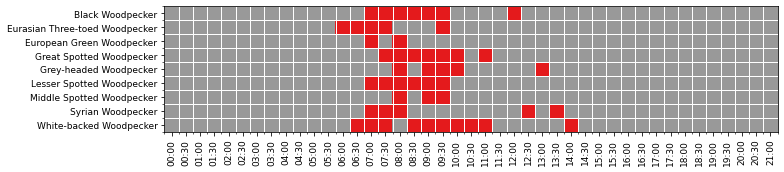

In [23]:
df = df.pivot( 'species', 'time', "count")
df = df.fillna(0)

# plot figure
fig = plt.figure(figsize= (11,2.5))
ax = fig.add_subplot(111)
ax.imshow(df, aspect="auto", interpolation="None", cmap="Set1_r")

# Major ticks
ax.set_xticks(np.arange(0, len(list(df)), 1))
ax.set_yticks(np.arange(0, len(df.index), 1))

# Labels for major ticks
ax.set_xticklabels(list(df),
                   fontsize=9,
                   rotation=90)
ax.set_yticklabels(df.index,
                   fontsize=9)

# Minor ticks
ax.set_xticks(np.arange(-0.5, len(list(df)), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(df.index), 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='major', color='w', linestyle='-', linewidth=0)
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

fig.tight_layout()

## Display a heatmap of annual activity with week resolution

make a copy of the dataset to avoid any modification of the original dataset

In [24]:
df = df_week_count.copy()

create a new dataframe with the normalized number of audio files per week

In [25]:
for species in list_species:
    #print(species)
    #print(df['species'])
    #print(df['species'] == species)
    print(df.loc[df['species'] == species, 'count'])
    print(df[df['species'] == species]['count']/np.max(df[df['species'] == species]['count']))

16    21
21    13
13    12
20    11
15    10
12     8
11     7
19     5
25     5
23     4
10     4
17     3
37     3
27     3
29     3
9      2
22     1
8      1
36     1
31     1
38     1
32     1
46     1
28     1
48     1
41     1
33     1
Name: count, dtype: int64
16    1.000000
21    0.619048
13    0.571429
20    0.523810
15    0.476190
12    0.380952
11    0.333333
19    0.238095
25    0.238095
23    0.190476
10    0.190476
17    0.142857
37    0.142857
27    0.142857
29    0.142857
9     0.095238
22    0.047619
8     0.047619
36    0.047619
31    0.047619
38    0.047619
32    0.047619
46    0.047619
28    0.047619
48    0.047619
41    0.047619
33    0.047619
Name: count, dtype: float64
12    29
11    11
16     9
13     8
17     7
19     4
21     4
7      4
22     3
37     3
15     3
9      2
20     2
24     2
8      2
25     1
3      1
18     1
10     1
26     1
14     1
29     1
41     1
6      1
33     1
Name: count, dtype: int64
12    1.000000
11    0.379310
16    0.310345
13

In [27]:
for species in list_species:
    df.loc[df['species'] == species, 'count'] = (df[df['species'] == species]['count']
                                                 /
                                                 np.max(df[df['species'] == species]['count']))

In [29]:
for species in list_species:
    print(df.loc[df['species'] == species, 'count'])

16    1.000000
21    0.619048
13    0.571429
20    0.523810
15    0.476190
12    0.380952
11    0.333333
19    0.238095
25    0.238095
23    0.190476
10    0.190476
17    0.142857
37    0.142857
27    0.142857
29    0.142857
9     0.095238
22    0.047619
8     0.047619
36    0.047619
31    0.047619
38    0.047619
32    0.047619
46    0.047619
28    0.047619
48    0.047619
41    0.047619
33    0.047619
Name: count, dtype: float64
12    1.000000
11    0.379310
16    0.310345
13    0.275862
17    0.241379
19    0.137931
21    0.137931
7     0.137931
22    0.103448
37    0.103448
15    0.103448
9     0.068966
20    0.068966
24    0.068966
8     0.068966
25    0.034483
3     0.034483
18    0.034483
10    0.034483
26    0.034483
14    0.034483
29    0.034483
41    0.034483
6     0.034483
33    0.034483
Name: count, dtype: float64
16    1.000000
15    0.923077
12    0.923077
11    0.794872
13    0.564103
7     0.538462
8     0.384615
17    0.358974
20    0.282051
10    0.230769
19    0.205128

Display the heatmap to see when (annually) the woodpeckers are active. Woodpeckers are the most active during the winter and beginning of spring (Februrary to April).

In [ ]:
df = df.pivot( 'species', 'week', "count")
df = df.fillna(0)

# plot figure
fig = plt.figure(figsize= (11,2.5))
ax = fig.add_subplot(111)

ax.imshow(df, aspect="auto", interpolation="None", cmap="Reds")

# Major ticks
ax.set_xticks(np.arange(0, len(list(df)), 1))
ax.set_yticks(np.arange(0, len(df.index), 1))

# Labels for major ticks
ax.set_xticklabels(list(df),
                   fontsize=9,
                   rotation=90)
ax.set_yticklabels(df.index,
                   fontsize=8)

# Minor ticks
ax.set_xticks(np.arange(-0.5, len(list(df)), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(df.index), 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='major', color='w', linestyle='-', linewidth=0)
ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

# add the title of the x-axis
ax.set_xlabel("week number")

fig.tight_layout()